In [167]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles

import sys
import pdb

sys.setrecursionlimit(10000)

In [159]:
def euclidean_distance(x1, X):
    return np.linalg.norm(x1 - X, axis=1)


class DBSCAN:
    
    def __init__(self, eps, min_points):
        self.eps = eps
        self.min_samples = min_points
        
    def fit(self, X, dist_measure=euclidean_distance):
        
        distance_matrix = []
        
        for x in X:
            distance_matrix.append(dist_measure(x, X))
            
        distance_matrix = np.array(distance_matrix)
        
        eps_bool_matrix = distance_matrix <= self.eps
        
        self.core_point_inds = np.where(eps_bool_matrix.sum(axis=1) > self.min_samples)[0]
        
        self.border_point_inds = np.where((eps_bool_matrix.sum(axis=1) < self.min_samples) & (eps_bool_matrix.sum(axis=1) != 0))[0]
        
        self.noise_point_inds = np.where(eps_bool_matrix.sum(axis=1) == 0)[0]
        
        # directly density reachable
#         self.dir_dens_reachable = eps_bool_matrix.copy()
    
        self.calc_points = []
        
        for i in range(len(X)):
            self.calc_points.append([])
            self.dens_connected(i, eps_bool_matrix)
        
        self.clusters = np.zeros(len(X))
        
        i = 0
        for row in self.calc_points:
            if len(row) > 1:
                for j in row:
                    self.clusters[j] = i
                i += 1
            elif len(row) == 1:
                for j in row:
                    self.clusters[j] = -1
                    
        # note -1 indic
            
    def dens_connected(self, i, eps_bool_mat):
        
        for row in self.calc_points:
            if i in row:
                return
        
        self.calc_points[-1].append(i)
        
        for k in np.where(eps_bool_mat[i] == True)[0]:
            if not k in self.calc_points[-1]:
                self.dens_connected(k, eps_bool_mat)

In [184]:
X, y = make_blobs(random_state=2022)

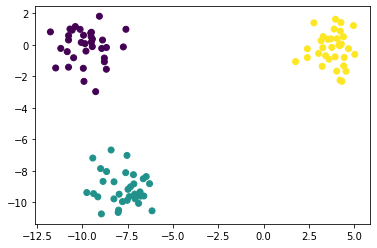

In [185]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [186]:
dbscan = DBSCAN(2, 5)

In [187]:
dbscan.fit(X)

In [188]:
dbscan.clusters

array([0., 1., 2., 2., 1., 1., 2., 2., 0., 2., 1., 0., 0., 2., 1., 1., 0.,
       2., 2., 0., 1., 2., 1., 1., 0., 0., 2., 2., 2., 1., 2., 1., 0., 0.,
       0., 0., 2., 1., 2., 0., 0., 2., 2., 0., 0., 1., 0., 1., 2., 0., 1.,
       2., 1., 1., 1., 1., 2., 0., 0., 0., 2., 0., 2., 2., 2., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 2., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 2., 0., 0., 1., 1., 2., 1., 0., 1., 0., 2.])

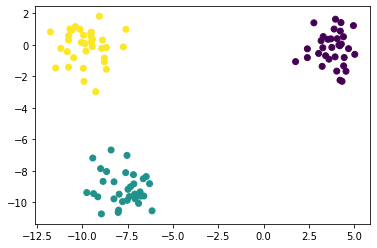

In [189]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters)
plt.show()

In [192]:
X, y = make_circles(500, random_state=2022, noise=0.05, factor=0.3)

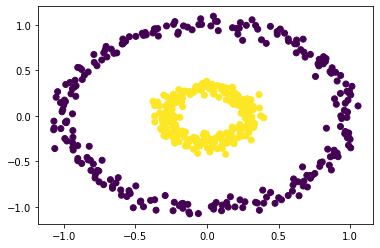

In [193]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [200]:
dbscan = DBSCAN(0.4, 5)
dbscan.fit(X)

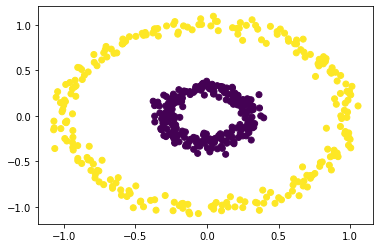

In [201]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters)
plt.show()